In [4]:
import ROOT,glob,math,os
from array import array

In [5]:
h1=ROOT.TH1F("theta_x","theta_x",200,-3.2,3.2)
h2=ROOT.TH1F("phi_1","phi_1",200,-3.2,3.2)
h3=ROOT.TH1F("phi_2","phi_2",200,-3.2,3.2)
h4=ROOT.TH1F("theta_phi_1","theta_phi_1",200,-3.2,3.2)
h5=ROOT.TH1F("theta_phi_2","theta_phi_2",200,-3.2,3.2)

Warning in <TROOT::Append>: Replacing existing TH1: theta_x (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: phi_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: phi_2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: theta_phi_1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: theta_phi_2 (Potential memory leak).


In [6]:
path="./root/"
paths=glob.glob(path+"*root")
print(paths)
rootpath=paths[0]

outpath=rootpath.replace("/root","/hist")
print(rootpath,outpath)


f=ROOT.TFile(rootpath,"r")
t=f.Get("nominal")
N=t.GetEntries()
for i in range(N):
    t.GetEntry(i)
    
    #给4个muon匹配，1和2匹配，3和4匹配
    muon_1=ROOT.TLorentzVector()
    muon_2=ROOT.TLorentzVector()
    muon_3=ROOT.TLorentzVector()
    muon_4=ROOT.TLorentzVector()
    jpsi_1=ROOT.TLorentzVector()
    jpsi_2=ROOT.TLorentzVector()
    if t.match[0]==t.match[1]:
        muon_1.SetPxPyPzE(t.muon_1[0],t.muon_1[1],t.muon_1[2],t.muon_1[3])
        muon_2.SetPxPyPzE(t.muon_2[0],t.muon_2[1],t.muon_2[2],t.muon_2[3])
        muon_3.SetPxPyPzE(t.muon_3[0],t.muon_3[1],t.muon_3[2],t.muon_3[3])
        muon_4.SetPxPyPzE(t.muon_4[0],t.muon_4[1],t.muon_4[2],t.muon_4[3])
        if abs((muon_1+muon_2).Px()-t.jpsi_1[0])<=1.:
            jpsi_1.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
            jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
        else:
            jpsi_1.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
            jpsi_2.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
    elif t.match[0]==t.match[2]:
        muon_1.SetPxPyPzE(t.muon_1[0],t.muon_1[1],t.muon_1[2],t.muon_1[3])
        muon_3.SetPxPyPzE(t.muon_2[0],t.muon_2[1],t.muon_2[2],t.muon_2[3])
        muon_2.SetPxPyPzE(t.muon_3[0],t.muon_3[1],t.muon_3[2],t.muon_3[3])
        muon_4.SetPxPyPzE(t.muon_4[0],t.muon_4[1],t.muon_4[2],t.muon_4[3])
        if abs((muon_1+muon_2).Px()-t.jpsi_1[0])<=1.:
            jpsi_1.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
            jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
        else:
            jpsi_1.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
            jpsi_2.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
    else:
        muon_1.SetPxPyPzE(t.muon_1[0],t.muon_1[1],t.muon_1[2],t.muon_1[3])
        muon_3.SetPxPyPzE(t.muon_2[0],t.muon_2[1],t.muon_2[2],t.muon_2[3])
        muon_4.SetPxPyPzE(t.muon_3[0],t.muon_3[1],t.muon_3[2],t.muon_3[3])
        muon_2.SetPxPyPzE(t.muon_4[0],t.muon_4[1],t.muon_4[2],t.muon_4[3])
        if abs((muon_1+muon_2).Px()-t.jpsi_1[0])<=1.:
            jpsi_1.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
            jpsi_2.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
        else:
            jpsi_1.SetPxPyPzE(t.jpsi_2[0],t.jpsi_2[1],t.jpsi_2[2],t.jpsi_2[3])
            jpsi_2.SetPxPyPzE(t.jpsi_1[0],t.jpsi_1[1],t.jpsi_1[2],t.jpsi_1[3])
    x=jpsi_1+jpsi_2
    
    #计算平面夹角phi1和phi2
    p_muon_1=ROOT.Math.Plane3D.Point() 
    p_muon_1.SetXYZ(muon_1.Px(),muon_1.Py(),muon_1.Pz())
    p_muon_2=ROOT.Math.Plane3D.Point() 
    p_muon_2.SetXYZ(muon_2.Px(),muon_2.Py(),muon_2.Pz())
    p_muon_3=ROOT.Math.Plane3D.Point() 
    p_muon_3.SetXYZ(muon_3.Px(),muon_3.Py(),muon_3.Pz())
    p_muon_4=ROOT.Math.Plane3D.Point() 
    p_muon_4.SetXYZ(muon_4.Px(),muon_4.Py(),muon_4.Pz())
    p_jpsi_1=ROOT.Math.Plane3D.Point() 
    p_jpsi_1.SetXYZ(jpsi_1.Px(),jpsi_1.Py(),jpsi_1.Pz())
    p_jpsi_2=ROOT.Math.Plane3D.Point() 
    p_jpsi_2.SetXYZ(jpsi_2.Px(),jpsi_2.Py(),jpsi_2.Pz())
    p_zero=ROOT.Math.Plane3D.Point() 
    p_zero.SetXYZ(0.0,0.0,0.0)
    muon_plane_12=ROOT.Math.Plane3D(p_zero,p_muon_1,p_muon_2)
    muon_plane_34=ROOT.Math.Plane3D(p_zero,p_muon_3,p_muon_4)
    jpsi_plane_12=ROOT.Math.Plane3D(p_zero,p_jpsi_1,p_jpsi_2)
    muon_nvector_12=muon_plane_12.Normal()
    muon_nvector_34=muon_plane_34.Normal()
    jpsi_nvector_12=jpsi_plane_12.Normal()
    
    muon_nvector3_12=ROOT.TVector3()
    muon_nvector3_12.SetXYZ(muon_nvector_12.X(),muon_nvector_12.Y(),muon_nvector_12.Z())
    muon_nvector3_34=ROOT.TVector3()
    muon_nvector3_34.SetXYZ(muon_nvector_34.X(),muon_nvector_34.Y(),muon_nvector_34.Z())
    jpsi_nvector3_12=ROOT.TVector3()
    jpsi_nvector3_12.SetXYZ(jpsi_nvector_12.X(),jpsi_nvector_12.Y(),jpsi_nvector_12.Z())
    phi_1=jpsi_nvector3_12.Angle(muon_nvector3_12)
    phi_2=jpsi_nvector3_12.Angle(muon_nvector3_34)
    #print("Phi_12",phi_1,phi_2)    
        
    #Boost到4个muon的质心系下面，并计算theta_x
    #print("M_1",muon_1.Px(),muon_1.Py(),muon_1.Pz())
    #print("M_2",muon_2.Px(),muon_2.Py(),muon_2.Pz())
    #print("J_1",jpsi_1.Px(),jpsi_1.Py(),jpsi_1.Pz())
    #print("J_2",jpsi_2.Px(),jpsi_2.Py(),jpsi_2.Pz())
    boost=-(muon_1+muon_2+muon_3+muon_4).BoostVector()
    muon_1.Boost(boost)
    muon_2.Boost(boost)
    muon_3.Boost(boost)
    muon_4.Boost(boost)
    jpsi_1.Boost(boost)
    jpsi_2.Boost(boost)
    theta_x=x.Angle(jpsi_1.Vect())
    #print("Theta_X",theta_x)
    muon_RF=ROOT.TLorentzVector()
    muon_RF=muon_1+ muon_2+ muon_3 + muon_4
    #print("RF",muon_RF.Px(),muon_RF.Py(),muon_RF.Pz())
    #print("M_1",muon_1.Px(),muon_1.Py(),muon_1.Pz())
    #print("M_2",muon_2.Px(),muon_2.Py(),muon_2.Pz())
    #print("M_3",muon_3.Px(),muon_3.Py(),muon_3.Pz())
    #print("M_4",muon_4.Px(),muon_4.Py(),muon_4.Pz())
    #print("J_1",jpsi_1.Px(),jpsi_1.Py(),jpsi_1.Pz())
    #print("J_2",jpsi_2.Px(),jpsi_2.Py(),jpsi_2.Pz())
    
    
    #Boost到12的CM，计算theta_phi_1
    boost_12=-(muon_1+muon_2).BoostVector()
    muon_1.Boost(boost_12)
    muon_2.Boost(boost_12)
    #print("M_1",muon_1.Px(),muon_1.Py(),muon_1.Pz())
    #print("M_2",muon_2.Px(),muon_2.Py(),muon_2.Pz())
    theta_phi_1=muon_1.Angle(jpsi_1.Vect())
    
    #Boost到34的CM，计算theta_phi_2
    boost_34=-(muon_3+muon_4).BoostVector()
    muon_3.Boost(boost_34)
    muon_4.Boost(boost_34)
    #print("M_3",muon_3.Px(),muon_3.Py(),muon_3.Pz())
    #print("M_4",muon_4.Px(),muon_4.Py(),muon_4.Pz())
    theta_phi_2=muon_3.Angle(jpsi_2.Vect())
    #print("Theta_phi_12",theta_phi_1,theta_phi_2)
    
    h1.Fill(theta_x)
    h2.Fill(phi_1)
    h3.Fill(phi_2)
    h4.Fill(theta_phi_1)
    h5.Fill(theta_phi_2)
    
outFile = ROOT.TFile.Open(outpath,'UPDATE')
outFile.cd()
h1.Write(h1.GetName(),ROOT.TObject.kOverwrite)
h2.Write(h2.GetName(),ROOT.TObject.kOverwrite)
h3.Write(h3.GetName(),ROOT.TObject.kOverwrite)
h4.Write(h4.GetName(),ROOT.TObject.kOverwrite)
h5.Write(h5.GetName(),ROOT.TObject.kOverwrite)
outFile.Close()
f.Close()

['./root/DPSMerge_data_cut0.root', './root/DPSMerge_data_cut2p5.root', './root/DPSMerge_data_cut3.root', './root/bbJJMerge_data_cut0.root', './root/bbJJMerge_data_cut6.root']
./root/DPSMerge_data_cut0.root ./hist/DPSMerge_data_cut0.root


In [12]:
path1="./hist/DPSMerge_data_cut0.root"
f1=ROOT.TFile(path1,"r")
hists=[]
for i in f1.GetListOfKeys():
    print(i.GetName())
    hists.append(i.GetName())

theta_x
phi_1
phi_2
theta_phi_1
theta_phi_2


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


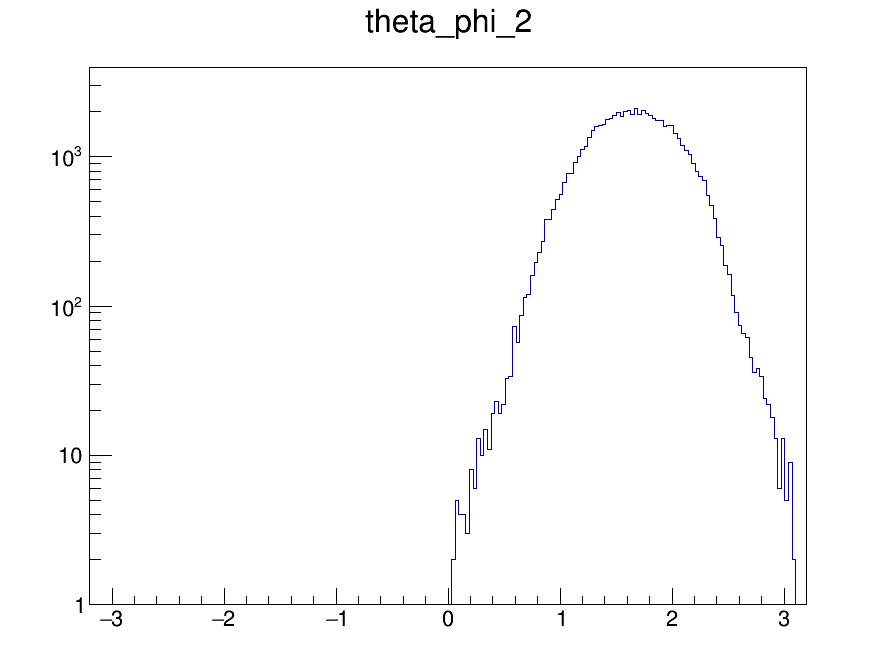

In [16]:
h1=f1.Get(hists[4])
c1=ROOT.TCanvas("c1","c1",100,0,900,700)
c1.SetLogy()
ROOT.gStyle.SetOptStat(0)
h1.Draw()
c1.Draw()